In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

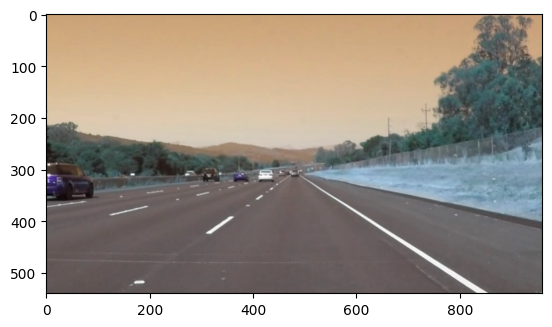

In [24]:
img = cv2.imread('data/road.jpg')
plt.imshow(img)

In [25]:
img.shape

(540, 960, 3)

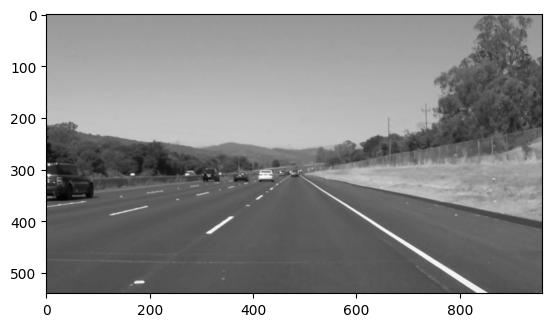

In [26]:
img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
plt.imshow(img, cmap='gray')

In [27]:
img.shape

(540, 960)

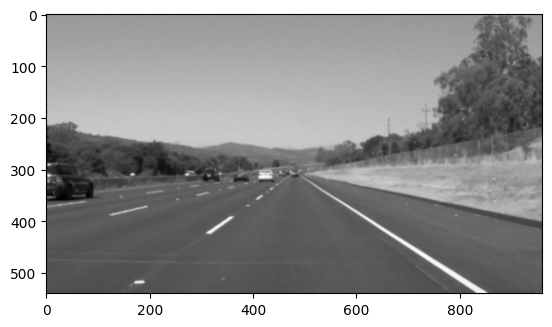

In [28]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap='gray')

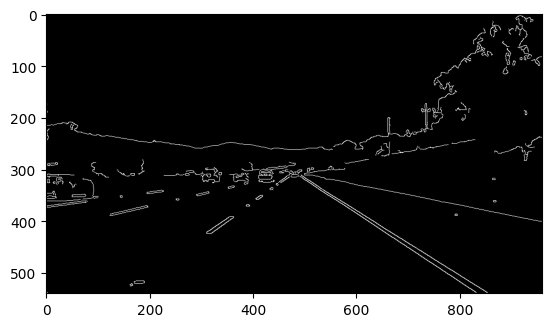

In [29]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

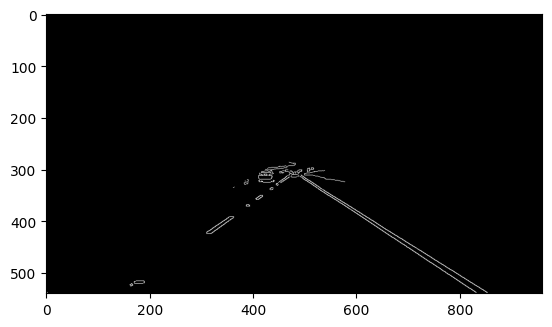

In [30]:
vertices = np.array([[(0, img.shape[0]), (img.shape[1] / 2, img.shape[0] / 2), (img.shape[1], img.shape[0])]], dtype=np.int32)
mask = np.zeros_like(edges)
cv2.fillPoly(mask, vertices, 255)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap='gray')

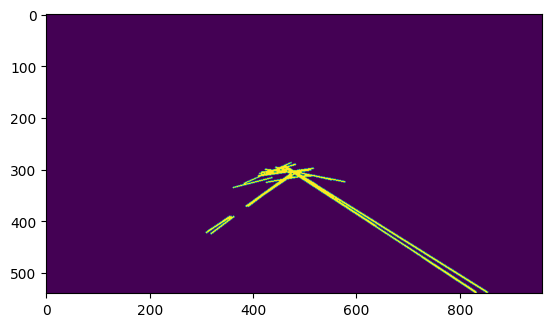

In [31]:
# Hough transformation
rho = 1
theta = np.pi / 180
threshold = 15
min_line_length = 40
max_line_gap = 20
line_image = np.copy(img) * 0
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(line_image)

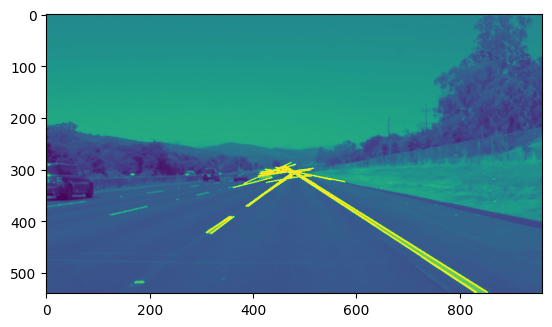

In [32]:
combo = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(combo)

In [33]:
# same on video
cap = cv2.VideoCapture('data/road.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGRA2GRAY)
        blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
        edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
        mask = np.zeros_like(edges)
        cv2.fillPoly(mask, vertices, 255)
        masked_edges = cv2.bitwise_and(edges, mask)
        line_image = np.copy(frame) * 0
        lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        combo = cv2.addWeighted(frame, 0.8, line_image, 1, 0)
        cv2.imshow('frame', combo)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1